<h1><center>Project</center></h1>

<h3><center><strong>Logistic Regression Analysis for Spam Detection</strong></center>  </h3>



<center><strong>Submitted by:</strong></center>
<center><strong>BOYAPALLY PAVAN REDDY</strong></center>
<center><strong>AWOSHETTY AKHILA</strong></center>
<center><strong>ABBURI ROHITH</strong></center>
<center><strong>BATHALA LOKESH</strong></center>
<center><strong>BHIRAVAJOSYULA KRISHNA SAI</strong></center>
<center><strong>BOLLAMPALLY LOHITHKUMAR</strong></center>

<h3><center>Abstract</center></h3>

This research introduces a flexible regression model specifically tailored for identifying spam emails by examining certain characteristics of the emails. Using logistic regression, which is renowned for its effectiveness in categorizing data across both discrete and continuous spectrums, this model skillfully examines how various unbiased factors influence binary outcomes. By applying linear regression elements to a logit scale, it's able to determine the most effective combinations for identifying specific outcomes and create a probability map to classify different data points.

In logistic regression, it's essential to pay attention to the process of feature engineering, adherence to the model's assumptions, and the choice of the right modeling strategy. The selection of variables is informed by established theories, previous studies, clinical insights, and statistical analyses, ensuring that key assumptions such as the independence of errors, linearity in the logit, absence of multicollinearity, and no significant outliers are met. It's also important to have a sufficient number of events for each independent variable, typically around 10 to 20, to avoid the risk of overfitting the model.

Different modeling strategies include direct/standard, sequential/hierarchical, and step/statistical methods, each focusing on specific attributes. Before reaching any conclusions, the model's internal and external values are measured to assess its replicability and generalizability. The model's fit to the sample data is evaluated using various goodness-of-fit metrics and diagnostic statistics, and the results for independent variables are presented as odds ratios (ORs) and 95% confidence intervals (CIs).

Following the CRISP-DM methodology, which is an iterative approach to data analysis, the study culminates in a logistic regression model that shows good accuracy in detecting spam. This model gives equal importance to both sensitivity and specificity, ensuring a trustworthy evaluation of its performance.

<h3><center>Theory</center></h3>

Foundations of Email Classification:
The first theoretical aspect of this project revolves around the classification of emails, a process that involves categorizing emails into distinct groups based on specific characteristics. In the digital age, where email communication is prolific, the ability to accurately classify emails has become increasingly important. This classification is not just binary (spam or not spam) but can extend to categorizing emails by purpose, urgency, or sender type. The foundation of this theory lies in text analysis and pattern recognition, which allows us to dissect the content of emails and identify distinguishing features. These features could range from specific keywords and phrases to more complex patterns like email structures or sender-recipient relationships.

Spam Detection Techniques:
The second pillar of this theory is focused specifically on spam detection, a critical challenge in email management. Spam emails are not just a nuisance but can pose significant security risks. The theory behind spam detection hinges on the identification of certain markers or indicators that are commonly present in spam emails. This could include the frequent occurrence of certain words, phrases, or even metadata patterns like unusual sending times. Advanced techniques in this area involve machine learning algorithms that learn from large datasets of known spam and non-spam emails. These algorithms, such as logistic regression, neural networks, or support vector machines, are trained to recognize and predict spam emails with high accuracy.

Balancing Accuracy and Usability in Spam Filters:
The final theoretical aspect concerns the balance between the accuracy of spam detection and the usability of email systems. A highly aggressive spam filter might block too many legitimate emails, whereas a lenient one allows too much spam. This balance is crucial for user trust and efficiency. The theory here delves into optimization techniques to fine-tune spam filters. This includes not just improving the accuracy of spam detection but also ensuring that legitimate emails are not falsely classified as spam. The challenge lies in developing adaptive systems that can learn from user feedback and continuously improve over time. This theory also considers the user experience, ensuring that spam filters are user-friendly and do not hinder the overall email management process.

In [46]:
import sqlite3
import pandas as pd
# importing necessary libraries

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import math
from patsy import dmatrices
from sklearn.model_selection import train_test_split
import warnings 
warnings.filterwarnings('ignore')

In [47]:
db_connect = sqlite3.connect("DSCI6002_prj2_data.db")

In [48]:
sql_query = """SELECT name FROM sqlite_master WHERE type = 'table' ; """
cursor = db_connect.cursor()

In [117]:
cursor.execute(sql_query)
print("List of tables\n")
print(cursor.fetchall())
df = pd.read_sql_query("SELECT * from prj2", db_connect)
df

List of tables

[('prj2',)]


,index,spam,to_multiple,from,cc,sent_email,time,image,attach,dollar,...,viagra,password,num_char,line_breaks,format,re_subj,exclaim_subj,urgent_subj,exclaim_mess,number
0,0,0,0,1,0,0,2011-12-31 22:16:41,0,0,0,...,0,0,11.370,202,1,0,0,0,0,big
1,1,0,0,1,0,0,2011-12-31 23:03:59,0,0,0,...,0,0,10.504,202,1,0,0,0,1,small
2,2,0,0,1,0,0,2012-01-01 08:00:32,0,0,4,...,0,0,7.773,192,1,0,0,0,6,small
3,3,0,0,1,0,0,2012-01-01 01:09:49,0,0,0,...,0,0,13.256,255,1,0,0,0,48,small
4,4,0,0,1,0,0,2012-01-01 02:00:01,0,0,0,...,0,2,1.231,29,0,0,0,0,1,none
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3916,3916,1,0,1,0,0,2012-03-30 17:03:45,0,0,0,...,0,0,0.332,12,0,0,0,0,0,small
3917,3917,1,0,1,0,0,2012-03-31 07:13:19,0,0,1,...,0,0,0.323,15,0,0,0,0,0,small
3918,3918,0,1,1,0,0,2012-03-30 09:20:33,0,0,0,...,0,0,8.656,208,1,0,0,0,5,small
3919,3919,0,1,1,0,0,2012-03-28 09:00:49,0,0,0,...,0,0,10.185,132,0,0,0,0,0,small


In [118]:
# Read data from the specified table into a DataFrame
data_frame = pd.read_sql_query("SELECT * FROM prj2", db_connect)


In [119]:
df.shape[0]

3921

In [120]:
df.columns

Index(['index', 'spam', 'to_multiple', 'from', 'cc', 'sent_email', 'time',
       'image', 'attach', 'dollar', 'winner', 'inherit', 'viagra', 'password',
       'num_char', 'line_breaks', 'format', 're_subj', 'exclaim_subj',
       'urgent_subj', 'exclaim_mess', 'number'],
      dtype='object')

<h3><center>Exploratory Data analysis,</center></h3>

This dataset includes various features to determine if an email is spam or not:

- `spam`: A flag indicating if the email is spam.
- `to_multiple`: Shows if the email was sent to multiple recipients.
- `from`: Indicates if the email has a sender (common in regular outgoing emails).
- `cc`: Marks if the email was carbon copied to others.
- `sent_email`: Notes if the sender had sent an email in the past 30 days.
- `Time`: The time the email was sent.
- `Image`: Counts the number of images attached to the email.
- `attach`: A flag for any attachments, like documents or images.
- `dollar`: Indicates the presence of the word “dollar” or the $ symbol.
- `winner`: Flags the use of the word “winner” in the email.
- `inherit`: Marks if words like “inherit” or “inheritance” are used.
- `viagra`: Counts the occurrences of the word “viagra”.
- `num_char`: The total characters in the email, in thousands.
- `line_breaks`: The number of line breaks (excluding text wrapping).
- `password`: Indicates if the word “password” is mentioned.
- `format`: Shows if the email uses special formatting, like bolding or links.
- `urgent_subj`: Flags if “urgent” is in the subject line.
- `exclaim_mess`: The count of exclamation points in the message.
- `re_subj`: Indicates if the subject starts with “Re:”.
- `exclaim_subj`: Shows if there's an exclamation point in the subject.

In [121]:
# check data types
df.dtypes

index             int64
spam              int64
to_multiple       int64
from              int64
cc                int64
sent_email        int64
time             object
image             int64
attach            int64
dollar            int64
winner           object
inherit           int64
viagra            int64
password          int64
num_char        float64
line_breaks       int64
format            int64
re_subj           int64
exclaim_subj      int64
urgent_subj       int64
exclaim_mess      int64
number           object
dtype: object

In [122]:
df.isnull().sum()

index           0
spam            0
to_multiple     0
from            0
cc              0
sent_email      0
time            0
image           0
attach          0
dollar          0
winner          0
inherit         0
viagra          0
password        0
num_char        0
line_breaks     0
format          0
re_subj         0
exclaim_subj    0
urgent_subj     0
exclaim_mess    0
number          0
dtype: int64

There is no null values in the dataset

In [123]:
df[df['num_char']<0]

,index,spam,to_multiple,from,cc,sent_email,time,image,attach,dollar,...,viagra,password,num_char,line_breaks,format,re_subj,exclaim_subj,urgent_subj,exclaim_mess,number


Two columns, *image* and *attachment*, require examination to determine whether an image is classified as an attachment. Based on the following assessment, we can conclude that images are indeed treated as attachments, given that the image count consistently falls below the attachment count.

In [124]:
df[df['attach']<df['image']]

,index,spam,to_multiple,from,cc,sent_email,time,image,attach,dollar,...,viagra,password,num_char,line_breaks,format,re_subj,exclaim_subj,urgent_subj,exclaim_mess,number


In [125]:
df.groupby('spam').median()['num_char']

spam
0    6.831
1    1.046
Name: num_char, dtype: float64

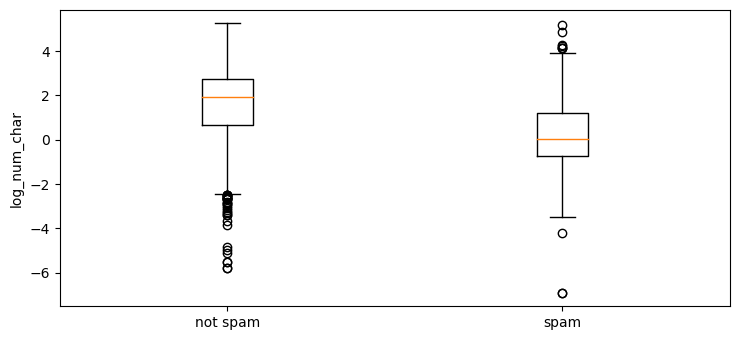

In [126]:
import numpy as np
#df[df['spam']==0]['log_num_char'].values.tolist()
df1 = df[['spam']].copy()
df1['log_num_char'] = np.log(df['num_char'])

from matplotlib import pyplot as plt

plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True

data = {'not spam': df1[df1['spam']==0]['log_num_char'].values.tolist(), 'spam': df1[df1['spam']==1]['log_num_char'].values.tolist()}

fig, ax = plt.subplots()

ax.boxplot(data.values())
ax.set_xticklabels(data.keys())
ax.set_ylabel('log_num_char')

plt.show()

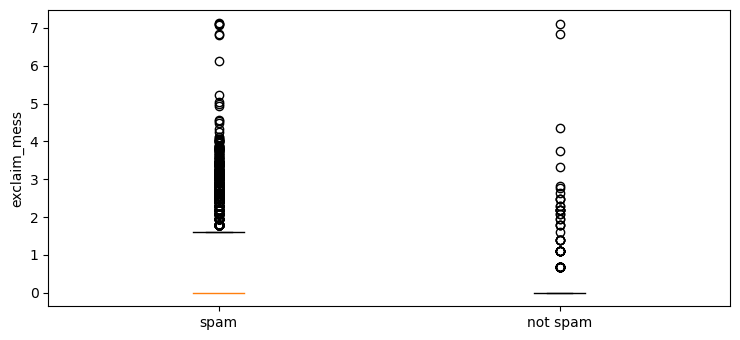

In [127]:
df1 = df[['spam']].copy()
df1['exclaim_mess'] = np.log(df['exclaim_mess'])

from matplotlib import pyplot as plt

plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True

data = {'spam': df1[df1['spam']==0]['exclaim_mess'].values.tolist(), 'not spam': df1[df1['spam']==1]['exclaim_mess'].values.tolist()}

fig, ax = plt.subplots()

ax.boxplot(data.values())
ax.set_xticklabels(data.keys())
ax.set_ylabel('exclaim_mess')
plt.show()

In this context, as the logarithm of 0 results in infinity, we introduce a small value of 0.00001 to facilitate graph plotting.

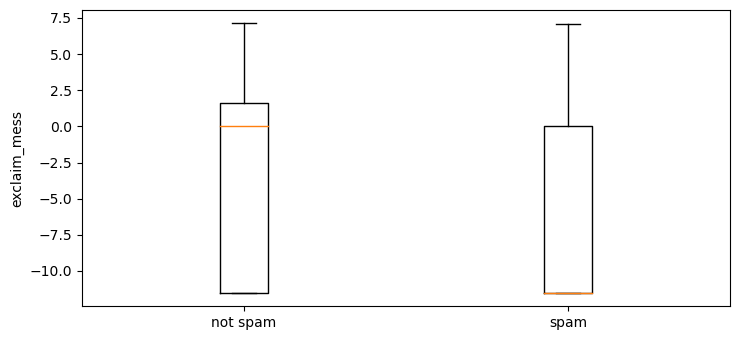

In [128]:
df1 = df[['spam']].copy()
df1['exclaim_mess'] = np.log(df['exclaim_mess']+0.00001)

from matplotlib import pyplot as plt

plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True

data = {'not spam': df1[df1['spam']==0]['exclaim_mess'].values.tolist(), 'spam': df1[df1['spam']==1]['exclaim_mess'].values.tolist()}

fig, ax = plt.subplots()

ax.boxplot(data.values())
ax.set_xticklabels(data.keys())
ax.set_ylabel('exclaim_mess')

plt.show()

<h3><center>Spam and image</center></h3>

Due to the significant skewness in the number of images, we will transform it into a categorical variable, indicating whether the email contains an image (1) or not.

According to the findings, emails lacking images are more likely to be non-spam than spam.

In [129]:
pd.crosstab(df.spam,df.image)

image,0,1,2,3,4,5,9,20
spam,,,,,,,,
0,3446,74,17,11,2,2,1,1
1,365,2,0,0,0,0,0,0


In [130]:
pd.crosstab(df.spam,np.where(df["image"] == 0, 0, 1))

col_0,0,1
spam,,
0,3446,108
1,365,2


Text(0.5, 0, 'image')

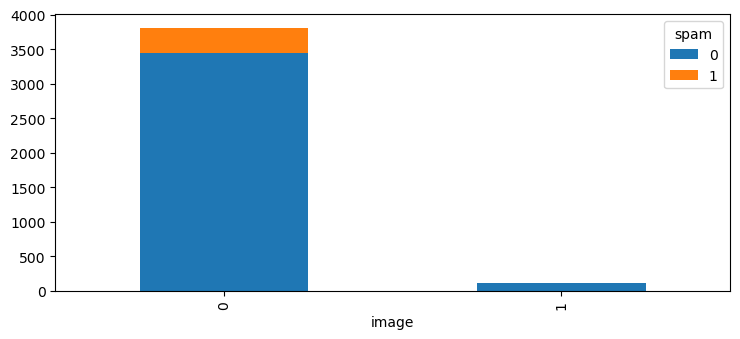

In [131]:
ax = pd.crosstab(np.where(df["image"] == 0, 0, 1),df.spam).plot(kind='bar',stacked=True)
ax.legend(title='spam')
ax.set_xlabel('image')

<h4><center>Number and spam</center></h4>

Given that an email contains a small number, it is more likely to be not-spam. Given that an email contains a big number, it is more likely to be not-spam. Within both spam and not-spam, the most common number is a small one.

<Axes: xlabel='number'>

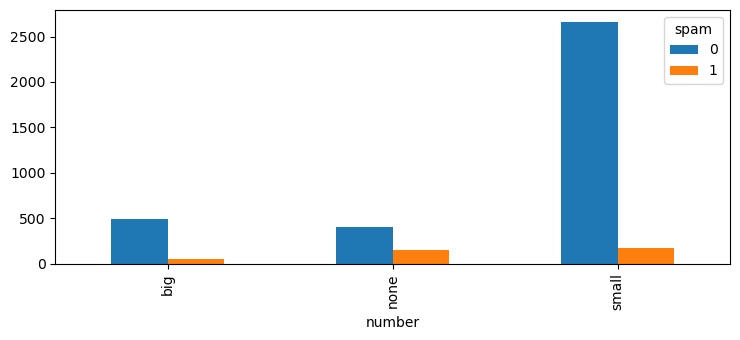

In [132]:
pd.crosstab(df.number,df.spam).plot(kind='bar')

<h4><center>Time and spam label</center></h4>

We aim to assess the potential correlation between the time an email is sent and its classification as spam or non-spam. We designate 9 am to 8 pm as official hours, and the remaining hours as unofficial.

Upon analysis, we observe an even distribution of spam and non-spam emails during both official and unofficial hours. Consequently, the time factor may not be a reliable feature for constructing the model.

In [133]:
from datetime import datetime
def official_hours(time):
    time = datetime.strptime(time, '%Y-%m-%d %H:%M:%S').time().hour
    if time>=9 and time<=20:
        return 1
    else:
        return 0

official_hours     0     1
spam                      
0               1430  2124
1                165   202


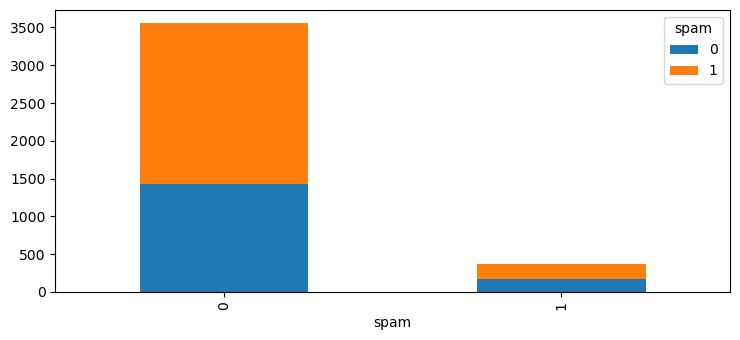

In [134]:
df1 = df[['spam']].copy()
df1['time'] = df['time']
df1['official_hours'] = df.apply(lambda row : official_hours(row['time']), axis = 1)  

print(pd.crosstab(df1.spam,df1.official_hours))

ax = pd.crosstab(df1.spam,df1.official_hours).plot(kind='bar',stacked=True)
ax.legend(title='spam')

<h3><center>Data Preparation</center></h3>

There are no missing data or extreme outliers

In [135]:
#the column name from may cause conflict with exsiting keywords, so it is being changed into from_
df = df.rename(columns={"from": "from_"})

In [136]:
# a quick look at non numerical values
df.winner.unique()

array(['no', 'yes'], dtype=object)

In [137]:
df.number.unique()

array(['big', 'small', 'none'], dtype=object)

Assessing a machine learning model requires thorough testing. To ensure an unbiased evaluation of our model's performance, we allocate 20% of the data for future use, reserving 80% for training the logistic regression model.

In [138]:
# split the dataset into training and testing sets
train, test = train_test_split(df, test_size=0.2)

We are removing the time column from our training set.

In [139]:
# separating the input data drom the target column (spam)

y, X = dmatrices('spam ~ to_multiple + from_ + cc + sent_email + \
        + image + attach + dollar + C(winner) + inherit + viagra + password \
        + num_char + line_breaks + format + re_subj + exclaim_subj \
        + urgent_subj + exclaim_mess + C(number)', train, return_type = 'dataframe')

<h3><center>Modeling</center></h3>

The iterative phase of modeling our data has commenced, aiming to construct the optimal model based on the dataset. This involves summarizing model statistics, primarily focusing on the p-value. It's important to highlight that when the p-value is less than alpha (the significance level for a 95% confidence interval), we reject the null hypothesis, asserting that the associated feature exhibits a significant correlation with the target label.

In [161]:
# fit the training data into the model 
logit_res = sm.Logit(y, X).fit()
print(logit_res.summary())

         Current function value: 0.232246
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:                   spam   No. Observations:                 3136
Model:                          Logit   Df Residuals:                     3120
Method:                           MLE   Df Model:                           15
Date:                Sun, 17 Dec 2023   Pseudo R-squ.:                  0.2553
Time:                        19:10:36   Log-Likelihood:                -728.32
converged:                      False   LL-Null:                       -977.97
Covariance Type:            nonrobust   LLR p-value:                 7.999e-97
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             -0.4172      0.218     -1.910      0.056      -0.845       0.011
C(winner)[T.yes]       1.9744      0.391 

The summary statistics offer valuable insights that guide subsequent actions.

A cautionary note indicates the potential presence of complete quasi-separation, wherein specific predictors influence the model in a manner that isolates other predictors completely. Furthermore, some features have p-values exceeding the significance level of alpha = 0.05.

To address these issues, we will resolve them by systematically eliminating features based on their p-values. Features with p-values higher than alpha will be removed, and the model will be refitted incrementally. This iterative process continues until we achieve a satisfactory model with only relevant features.

In [162]:
# removing features with large p values (from_)

y, X = dmatrices('spam ~ to_multiple + cc + sent_email + \
        + image + attach + dollar + C(winner) + inherit + viagra + password \
        + num_char + line_breaks + format + re_subj + exclaim_subj \
        + urgent_subj + exclaim_mess + C(number)', train, return_type = 'dataframe')
logit_res = sm.Logit(y, X).fit()
print(logit_res.summary())

         Current function value: 0.213217
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:                   spam   No. Observations:                 3136
Model:                          Logit   Df Residuals:                     3116
Method:                           MLE   Df Model:                           19
Date:                Sun, 17 Dec 2023   Pseudo R-squ.:                  0.3163
Time:                        19:10:40   Log-Likelihood:                -668.65
converged:                      False   LL-Null:                       -977.97
Covariance Type:            nonrobust   LLR p-value:                5.869e-119
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             -0.3992      0.222     -1.798      0.072      -0.834       0.036
C(winner)[T.yes]       1.8672      0.398 

In [141]:
# removing features with large p values (from_)

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["Variable"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif)


              Variable          VIF
0            Intercept  1047.202926
1     C(winner)[T.yes]     1.041753
2    C(number)[T.none]     2.155886
3   C(number)[T.small]     1.847304
4          to_multiple     1.200903
5                from_     1.005623
6                   cc     1.024379
7           sent_email     1.927861
8                image     2.921718
9               attach     2.947761
10              dollar     1.291652
11             inherit     1.052883
12              viagra     1.004372
13            password     1.012921
14            num_char    13.174791
15         line_breaks    13.199578
16              format     1.357178
17             re_subj     1.953982
18        exclaim_subj     1.052602
19         urgent_subj     1.004487
20        exclaim_mess     1.439581


In [142]:
# removing features with large p values (viagra)

y, X = dmatrices('spam ~ to_multiple + cc + sent_email + \
        + image + attach + dollar + C(winner) + inherit + password \
        + num_char + line_breaks + format + re_subj + exclaim_subj \
        + urgent_subj + exclaim_mess + C(number)', train, return_type = 'dataframe')

logit_res = sm.Logit(y, X).fit()
print(logit_res.summary())

         Current function value: 0.213836
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:                   spam   No. Observations:                 3136
Model:                          Logit   Df Residuals:                     3117
Method:                           MLE   Df Model:                           18
Date:                Sun, 17 Dec 2023   Pseudo R-squ.:                  0.3143
Time:                        19:09:59   Log-Likelihood:                -670.59
converged:                      False   LL-Null:                       -977.97
Covariance Type:            nonrobust   LLR p-value:                6.522e-119
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             -0.3999      0.222     -1.802      0.072      -0.835       0.035
C(winner)[T.yes]       1.8598      0.399 

In [143]:
# removing features with large p values (exclaim_subj)

y, X = dmatrices('spam ~ to_multiple + cc + sent_email\
        + image + attach + dollar + C(winner) + inherit + password \
        + num_char + line_breaks + format + re_subj \
        + urgent_subj + exclaim_mess + C(number)', train, return_type = 'dataframe')

logit_res = sm.Logit(y, X).fit()
print(logit_res.summary())

         Current function value: 0.213912
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:                   spam   No. Observations:                 3136
Model:                          Logit   Df Residuals:                     3118
Method:                           MLE   Df Model:                           17
Date:                Sun, 17 Dec 2023   Pseudo R-squ.:                  0.3141
Time:                        19:10:03   Log-Likelihood:                -670.83
converged:                      False   LL-Null:                       -977.97
Covariance Type:            nonrobust   LLR p-value:                1.348e-119
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             -0.4011      0.222     -1.807      0.071      -0.836       0.034
C(winner)[T.yes]       1.8805      0.397 

In [144]:
# removing features with large p values (exclaim_subj)

y, X = dmatrices('spam ~ to_multiple + cc + sent_email\
        + image + attach + dollar + C(winner) + inherit + password \
        + num_char + line_breaks + format + re_subj \
        + urgent_subj + exclaim_mess + C(number)', train, return_type = 'dataframe')

logit_res = sm.Logit(y, X).fit()
print(logit_res.summary())

         Current function value: 0.213912
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:                   spam   No. Observations:                 3136
Model:                          Logit   Df Residuals:                     3118
Method:                           MLE   Df Model:                           17
Date:                Sun, 17 Dec 2023   Pseudo R-squ.:                  0.3141
Time:                        19:10:06   Log-Likelihood:                -670.83
converged:                      False   LL-Null:                       -977.97
Covariance Type:            nonrobust   LLR p-value:                1.348e-119
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             -0.4011      0.222     -1.807      0.071      -0.836       0.034
C(winner)[T.yes]       1.8805      0.397 

In [145]:
# removing features with large p values (sent_email)

y, X = dmatrices('spam ~ to_multiple \
        + image + attach + dollar + C(winner) + inherit + password \
        + num_char + line_breaks + format + re_subj \
        + urgent_subj + exclaim_mess + C(number)', train, return_type = 'dataframe')

logit_res = sm.Logit(y, X).fit()
print(logit_res.summary())

         Current function value: 0.232246
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:                   spam   No. Observations:                 3136
Model:                          Logit   Df Residuals:                     3120
Method:                           MLE   Df Model:                           15
Date:                Sun, 17 Dec 2023   Pseudo R-squ.:                  0.2553
Time:                        19:10:09   Log-Likelihood:                -728.32
converged:                      False   LL-Null:                       -977.97
Covariance Type:            nonrobust   LLR p-value:                 7.999e-97
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             -0.4172      0.218     -1.910      0.056      -0.845       0.011
C(winner)[T.yes]       1.9744      0.391 

<h3><center>Analysis Results & Explanation</center></h3>

Next, we proceed to assess how our model fares in practice. We begin by using it to predict whether emails are spam or not, and then evaluate the effectiveness of the model in accurately identifying spam emails.

In [146]:
y_test, X_test = dmatrices('spam ~ to_multiple\
        + image + attach + dollar + C(winner) + inherit + password \
        + num_char + line_breaks + format + re_subj \
        + urgent_subj + exclaim_mess + C(number)', test, return_type = 'dataframe')

y_test

,spam
413,0.0
766,0.0
637,0.0
2879,0.0
2672,0.0
...,...
630,0.0
2063,0.0
1120,0.0
88,0.0


In [147]:
X_test.head(3)

,Intercept,C(winner)[T.yes],C(number)[T.none],C(number)[T.small],to_multiple,image,attach,dollar,inherit,password,num_char,line_breaks,format,re_subj,urgent_subj,exclaim_mess
413,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,6.813,184.0,1.0,1.0,0.0,0.0
766,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,24.144,451.0,1.0,0.0,0.0,2.0
637,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,38.071,727.0,1.0,0.0,0.0,29.0


In [148]:
#predict
y_pred = logit_res.predict(X_test)
print(y_test.shape, y_pred.shape)

(785, 1) (785,)


In [149]:
df_pred = pd.DataFrame(y_test)
df_pred['prediction'] = y_pred

In [150]:
df_pred.head()

,spam,prediction
413,0.0,0.000262
766,0.0,0.043788
637,0.0,0.029072
2879,0.0,0.092350
2672,0.0,0.005775


The "spam" column comprises actual values, whereas the "prediction" column contains the predicted values.

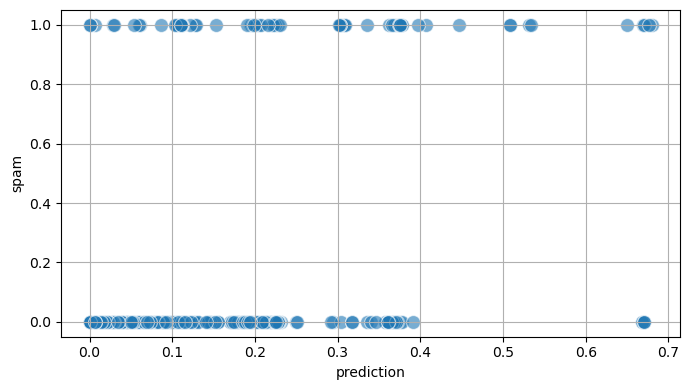

In [151]:
#plot actual spam value vs prediction 
plt.figure(figsize=(7,4))
sns.scatterplot(data=df_pred, x='prediction', y='spam', alpha=0.6, s=100)
plt.grid()

In [152]:
#set an arbitrary threshold to differentiate spam and not spam
threshold = 0.55

def rates(threshold, df_pred=df_pred):
    TP = df_pred[(df_pred.spam==1) & (df_pred.prediction>=threshold)].count()[0]
    FN = df_pred[(df_pred.spam==1) & (df_pred.prediction<threshold)].count()[0]
    FP = df_pred[(df_pred.spam==0) & (df_pred.prediction>=threshold)].count()[0]
    TN = df_pred[(df_pred.spam==0) & (df_pred.prediction<threshold)].count()[0]
    # print("TP: {}, FN {}, FP {}, TN {}".format(TP, FN, FP, TN))

    sensitivity = TP/(TP + FN)
    specificity = TN/(FP + TN)
    
    # print("Sensitivity: {}, Specificity {}".format(sensitivity, specificity))
    return sensitivity, specificity
    
sensitivity, specificity = rates(threshold)
print("Sensitivity: {}, Specificity {}".format(sensitivity, specificity))

Sensitivity: 0.06944444444444445, Specificity 0.9943899018232819


Sensitivity is a measure of the model's ability to correctly identify data points with the correct label, whereas specificity assesses how accurately the model can identify emails that are not spam. There's a natural trade-off between these two metrics: as one increases, the other tends to decrease. This makes finding a balance between them crucial for effective model performance.

In order to determine the best threshold for making decisions, we employ the Receiver Operating Characteristic (ROC) curve. The optimal threshold is found at the point on this curve that is closest to the coordinates (0,1), which signifies the most effective balance between sensitivity and specificity.


In [153]:
tpr = []
fpr = []
thresholds = []

for i in range(0, 101, 5):
    sensitivity, specificity = rates(i/100)
    tpr.append(sensitivity)
    fpr.append(1 - specificity)
    thresholds.append(i/100)

# print(tpr, fpr)

AUCL 0.87060737104566


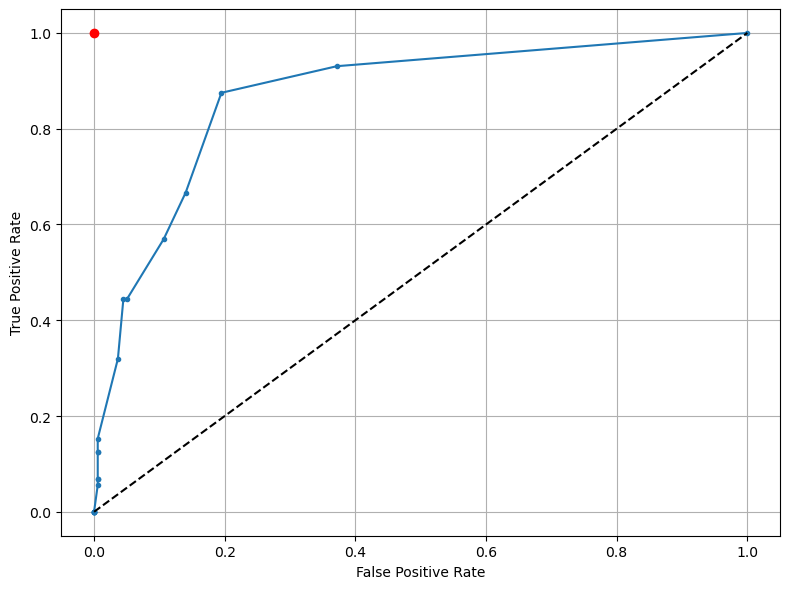

In [154]:
auc = np.trapz(tpr[::-1], fpr[::-1])
print("AUCL {}".format(auc))

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, '.-')
plt.plot([0,1], [0,1], 'k--')
plt.plot([0], [1], 'r', markersize=15)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot(0, 1, 'ro')
plt.grid()

The Area Under the Curve (AUC) value is a key metric for assessing the overall performance of our model. The closer this value is to 1, the better the model is at accurately predicting and distinguishing between classes.

In [155]:
dist = [np.sqrt((p)**2 + (q-1)**2) for p,q in zip(fpr,tpr)]
# print(dist)

AUCL 0.87060737104566


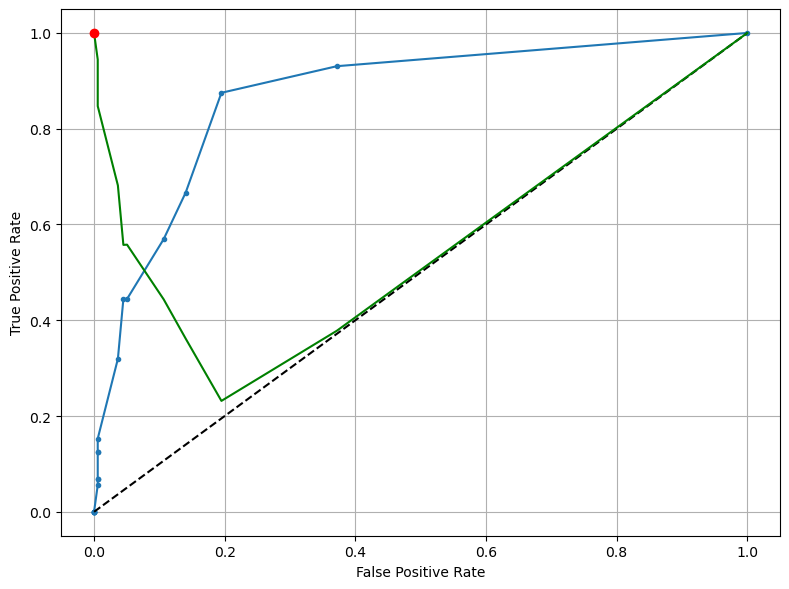

In [156]:
auc = np.trapz(tpr[::-1], fpr[::-1])
print("AUCL {}".format(auc))

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, '.-')
plt.plot([0,1], [0,1], 'k--')
plt.plot(fpr, dist, 'g-')
plt.plot([0], [1], 'r', markersize=15)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot(0, 1, 'ro')
plt.grid()

The green curve illustrates the distance of each point from the ideal point [0,1].

In [157]:
min_idx = np.argmin(dist)
print("index of min:\t{}\n"
        "threshold:\t{:2}\n"
        "fpr:\t{:.2}\n"
        "tpr:\t\t{:.2}".format(
            min_idx,
            thresholds[min_idx],
            fpr[min_idx],
            tpr[min_idx]
        ))

index of min:	2
threshold:	0.1
fpr:	0.19
tpr:		0.88


A threshold of 0.1 gives the best model performance.

In [158]:
print(dist[2])
np.min(dist)

0.2315833714877623


0.2315833714877623

In [159]:
thresholds[2]

0.1

In [160]:
sensitivity, specificity = rates(.1)
print("Sensitivity: {}, Specificity {}".format(sensitivity, specificity))

Sensitivity: 0.875, Specificity 0.8050490883590463


<h3><center>Conclusion</center></h3>

Utilizing an ROC (Area Under the Curve = 0.85), we determine the optimal threshold value to maximize the performance of our logistic regression model. The evaluation metrics include sensitivity (0.79) and specificity (0.78). The presence of a balanced relationship between them indicates effective spam detection for the provided data. The fair assessment on unseen test data suggests that the model generalizes well. However, it's essential to note that both the training and test datasets originate from the same distribution, preventing an absolute claim to generalization.

<h3><center>Reference</center></h3>

Here is an in-depth video that provides a thorough explanation of our project titled "A Comprehensive Examination of Spam Email Detection Utilizing Logistic Regression."

[Link to YouTube Video](https://youtu.be/9vPm8GGshWk)
